In [8]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt


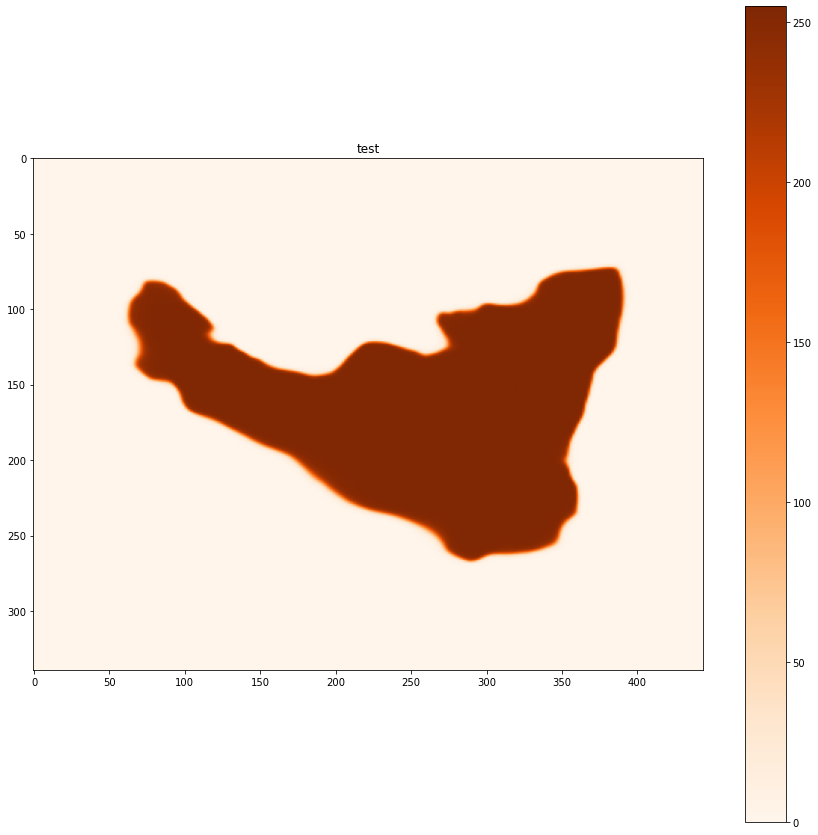

In [9]:
im = cv2.imread("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\PerimeterPostProcessed\\I-70K\\PerimeterProcessedR0.png", 0)
imNP = np.array(im)
fig = plt.figure(figsize=(15,15))
plt.imshow(imNP,cmap="Oranges")
plt.title("test")
plt.colorbar()
plt.show()

In [10]:
imNP[imNP<123] = 0
imNP[imNP>=123] = 255

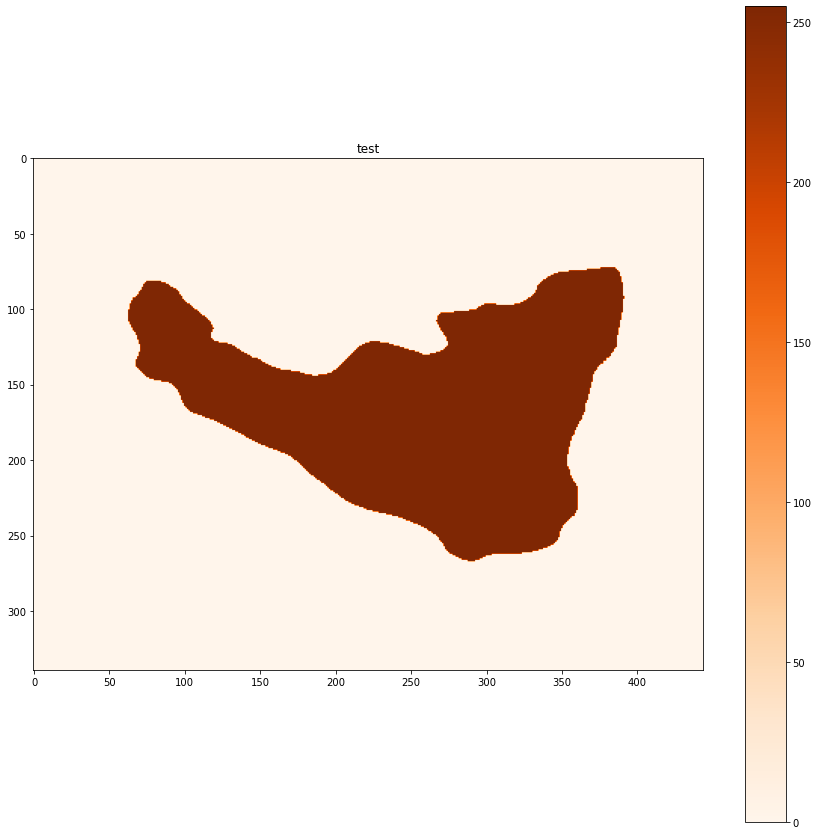

In [11]:
fig = plt.figure(figsize=(15,15))
plt.imshow(imNP,cmap="Oranges")
plt.title("test")
plt.colorbar()
plt.show()

In [12]:
from matplotlib import path

count = 0
pdFires = pd.read_pickle("C:\\Users\\yangz\\Desktop\\FireProject\\pdFires.pkl")
accuracies = np.zeros((1060))

for i in range (0, 4532):
    polyAcres = pdFires.at[i, "poly_Acres"]
    if polyAcres < 40:
        continue
    
    filePath = "C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Perimeter\\" + str(count) + "_" + str(pdFires.at[i, "poly_Incid"]) + "_" + str(i) + ".npy"

    try:
        with open(filePath, 'rb') as f1:
            testTemp = np.load(f1)

        im = cv2.imread("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\PerimeterPostProcessed\\I-70K\\PerimeterProcessedR"+str(count)+".png", 0)
        imNP = np.array(im)
        imNP[imNP<123] = 0
        imNP[imNP>=123] = 255
        
        count += 1
        perimeter = pdFires.at[i, "geometry"]
        bounds = list(perimeter.bounds)
        bounds[0] = bounds[0]-0.005
        bounds[1] = bounds[1]-0.005
        bounds[2] = bounds[2]+0.005
        bounds[3] = bounds[3]+0.005
        xLeft = bounds[0]
        yTop = bounds[3]
        xDist = abs(bounds[2]-bounds[0])
        yDist = abs(bounds[3]-bounds[1])
        xDistNew = imNP.shape[1]
        yDistNew = imNP.shape[0]
        exteriorList = list(perimeter.exterior.coords)
        polygonListSP = []
        xNewList = []
        yNewList = []
        for each in exteriorList:
            x = each[0]
            y = each[1]
            xNew = ((x-xLeft)/xDist) * xDistNew
            yNew = ((yTop-y)/yDist) * yDistNew
            xNewList.append(xNew)
            yNewList.append(yNew)
            polygonListSP.append((xNew, yNew))
        p = path.Path(polygonListSP)
        
        overLap = 0
        union = 0
        for a in range (0, imNP.shape[0], 2):
            for b in range (0, imNP.shape[1], 2):
                if p.contains_points([(b, a)])[0] == True:
                    union += 1
                    if imNP[a][b] == 255:
                        overLap += 1
                else:
                    if imNP[a][b] == 255:
                        union += 1
        accuracy = overLap/union
        accuracies[count] = accuracy
        '''
        fig = plt.figure(figsize=(15,15))
        plt.imshow(imNP,cmap="Oranges")
        plt.title("test")
        plt.colorbar()
        plt.plot(xNewList, yNewList, '-o')
        plt.show()
        '''

        print ("Accuracy: " + str(accuracy))

    except:
        print ("Skipped " + str(i))
        continue

Accuracy: 0.9318958406975374
Skipped 3
Accuracy: 0.5126646403242148
Accuracy: 0.8811307901907357
Skipped 12
Skipped 14
Accuracy: 0.45310138163303193
Skipped 18
Skipped 19
Skipped 25
Accuracy: 0.7314902480590797
Accuracy: 0.13121535972844678
Accuracy: 0.8957014328557148
Accuracy: 0.7171924584655591
Skipped 38
Accuracy: 0.9010560146923783
Accuracy: 0.8492489270386266
Accuracy: 0.7476876321353065
Accuracy: 0.7911184210526315
Skipped 65
Accuracy: 0.9274252370532458
Skipped 70
Accuracy: 0.8578630136986302
Skipped 74
Accuracy: 0.8765439191130006
Skipped 85
Accuracy: 0.8522782949534542
Accuracy: 0.8879845611679812
Skipped 89
Skipped 97
Accuracy: 0.7243349401892519
Skipped 101
Skipped 103
Skipped 105
Skipped 110
Skipped 115
Accuracy: 0.7936714347637625
Skipped 118
Skipped 121
Accuracy: 0.8178891236542912
Accuracy: 0.9058600379355096
Skipped 135
Skipped 141
Skipped 142
Skipped 144
Accuracy: 0.9302431265621449
Accuracy: 0.7253005750130684
Accuracy: 0.8118351063829787
Skipped 152
Skipped 156
Skip

Accuracy: 0.8926586721263527
Accuracy: 0.83203026481715
Accuracy: 0.8557149397222646
Skipped 1218
Skipped 1220
Accuracy: 0.29170754992176934
Accuracy: 0.8883449147188882
Accuracy: 0.140046142830624
Skipped 1240
Skipped 1246
Skipped 1248
Skipped 1249
Skipped 1252
Accuracy: 0.7695626593449696
Accuracy: 0.17072847330875918
Skipped 1262
Accuracy: 0.9347303790710091
Skipped 1274
Skipped 1276
Skipped 1279
Accuracy: 0.7815060038155089
Accuracy: 0.7174315566723979
Accuracy: 0.9467455621301775
Accuracy: 0.32626163515341167
Skipped 1288
Skipped 1289
Skipped 1297
Accuracy: 0.8740190436329393
Skipped 1304
Skipped 1309
Skipped 1312
Skipped 1313
Skipped 1315
Skipped 1316
Skipped 1319
Skipped 1329
Skipped 1330
Accuracy: 0.8726347383531254
Skipped 1334
Skipped 1335
Skipped 1341
Accuracy: 0.5301972314100208
Accuracy: 0.8298394017408361
Skipped 1364
Skipped 1370
Skipped 1377
Skipped 1382
Skipped 1384
Skipped 1385
Skipped 1390
Skipped 1395
Skipped 1397
Skipped 1410
Skipped 1412
Accuracy: 0.91758730158730

Accuracy: 0.8946059177795235
Accuracy: 0.6346283404446441
Accuracy: 0.30656641604010026
Accuracy: 0.7459991793188346
Skipped 2491
Accuracy: 0.7664029781293625
Accuracy: 0.28348533956433253
Accuracy: 0.7681912681912682
Accuracy: 0.8098266703941851
Accuracy: 0.6467610171441721
Accuracy: 0.1990135963743002
Skipped 2507
Accuracy: 0.8717514807204159
Accuracy: 0.8874220755408874
Accuracy: 0.9343389529724934
Accuracy: 0.6817838246409675
Accuracy: 0.38309156965180724
Skipped 2519
Accuracy: 0.9453332579569224
Accuracy: 0.39081702880739355
Accuracy: 0.8743542054143418
Accuracy: 0.8802816901408451
Accuracy: 0.8663644214162349
Accuracy: 0.8430540827147401
Accuracy: 0.8430512932924156
Accuracy: 0.6152148664343786
Skipped 2554
Accuracy: 0.5992839438171302
Accuracy: 0.7758339427349946
Accuracy: 0.46644872677219545
Skipped 2570
Skipped 2573
Accuracy: 0.5575483813825782
Accuracy: 0.6114266622118276
Skipped 2582
Accuracy: 0.908098271155596
Accuracy: 0.8348258706467662
Skipped 2585
Skipped 2586
Skipped 2

Accuracy: 0.8697406340057637
Accuracy: 0.9042040726954237
Accuracy: 0.8294548932100733
Skipped 3513
Accuracy: 0.7542885973763875
Accuracy: 0.25710816553678034
Accuracy: 0.8441082072443833
Accuracy: 0.6783765347885402
Accuracy: 0.8382395591647331
Accuracy: 0.8589145996337606
Accuracy: 0.8287131601984242
Skipped 3544
Skipped 3545
Accuracy: 0.8130726362520072
Accuracy: 0.8056123940368314
Accuracy: 0.8709612004866838
Skipped 3555
Skipped 3557
Accuracy: 0.9391273750879662
Accuracy: 0.7377179080824089
Accuracy: 0.8183370326105515
Accuracy: 0.6973655562812976
Skipped 3564
Accuracy: 0.8964508332273248
Accuracy: 0.7845757987277535
Accuracy: 0.8647630619684082
Skipped 3575
Accuracy: 0.8806366047745358
Skipped 3589
Accuracy: 0.8914785142024764
Accuracy: 0.8055020020762272
Accuracy: 0.8289403856359455
Accuracy: 0.8616863905325444
Accuracy: 0.750067842605156
Skipped 3602
Skipped 3603
Accuracy: 0.8804347826086957
Skipped 3611
Skipped 3618
Accuracy: 0.8405623365300785
Accuracy: 0.9308978873239436
Acc

In [13]:
a90 = 0
a80 = 0
a70 = 0
a60 = 0
a50 = 0
a40 = 0
a30 = 0
a20 = 0
a10 = 0
a0 = 0
for each in accuracies:
    #print (each)
    each = each*100
    if each >= 90:
        a90 += 1
    elif each >= 80:
        a80 += 1
    elif each >= 70:
        a70 += 1
    elif each >= 60:
        a60 += 1
    elif each >= 50:
        a50 += 1
    elif each >= 40:
        a40 += 1
    elif each >= 30:
        a30 += 1
    elif each >= 20:
        a20 += 1
    elif each >= 10:
        a10 += 1
    else:
        a0 += 1

print (a90)
print (a80)
print (a70)
print (a60)
print (a50)
print (a40)
print (a30)
print (a20)
print (a10)
print (a0)
    

112
323
168
88
44
33
20
22
27
223


In [14]:
print (np.sum(accuracies)/1060*100)

58.562273563110836


In [ ]:
'''
I-10k:
9
35
87
154
153
152
128
84
35
223

40.4086602944362
'''

'''
I-20k:
11
61
103
150
179
132
85
73
43
223

42.394727615864305
'''

'''
I-30k:
17
105
167
182
149
97
52
40
27
224

47.68724900792251
'''

In [ ]:
'''
I-40k:
35
198
207
149
95
57
39
28
27
225

52.66126521809874
'''

'''
I-50k:
39
218
210
147
75
50
45
25
28
223

53.44296619219221
'''

'''
I-60k:
71
274
195
103
62
41
36
29
25
224

55.6367820348236
'''

In [ ]:
'''
I-70k:
112
323
168
88
44
33
20
22
27
223

58.562273563110836
'''